In [66]:
import csv
import urllib
import math
import networkx as net
import matplotlib as plot

%matplotlib inline

In [2]:
from networkx.algorithms import bipartite as bi

In [4]:
url = 'https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter5/campaign_short.csv'
testfile = urllib.URLopener()
testfile.retrieve(url, "campaign_short.csv")

('campaign_short.csv', <httplib.HTTPMessage instance at 0x7f237812c6c8>)

In [5]:
r = csv.reader(open('campaign_short.csv', 'rU'))

In [7]:
g = net.Graph()
pacs = []
candidates = []

In [8]:
for row in r:
    if row[0] not in pacs:
        pacs.append(row[0])
    if row[12] not in candidates:
        candidates.append(row[12])
    g.add_edge(row[0], row[12], weight=int(row[10]))

In [9]:
print(net.info(g))

Name: 
Type: Graph
Number of nodes: 536
Number of edges: 929
Average degree:   3.4664


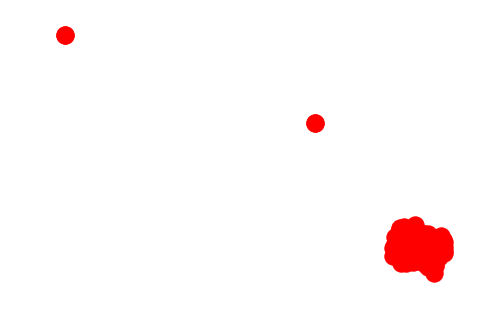

In [15]:
net.draw(g)

In [31]:
pacnet = bi.weighted_projected_graph(g, pacs, ratio=False)

In [32]:
print(net.info(pacnet))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 15
Average degree:   3.3333


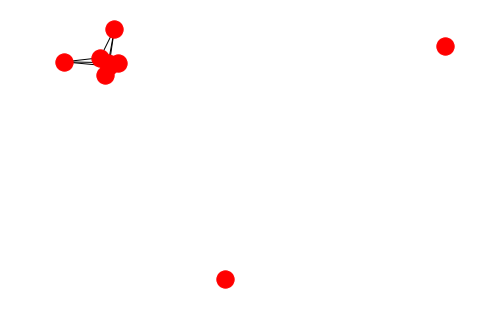

In [33]:
net.draw(pacnet)

In [34]:
#pacnet = sorted(net.connected_components(pacnet), key=len,reverse=True)[0]
pacnet = list(net.connected_component_subgraphs(pacnet))[0]

In [35]:
pacnet

In [46]:
weights = [math.log(float(edata['weight'])) for f,t,edata in pacnet.edges(data=True)]

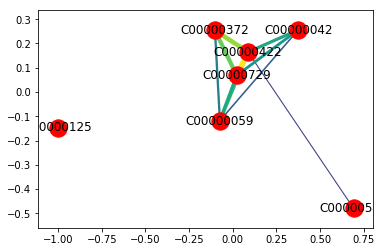

In [52]:
net.draw_networkx(pacnet, width=weights, edge_color=weights)

In [54]:
cannet=bi.weighted_projected_graph(g, candidates, ratio=False)

In [55]:
cannet=list(net.connected_component_subgraphs(cannet))[0]

In [68]:
weights = [math.log(float(edata['weight'])) for f,t,edata in cannet.edges(data=True)]

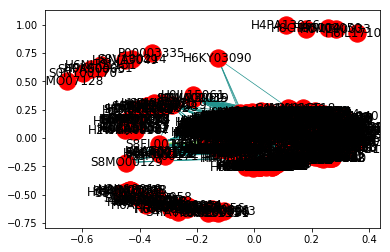

In [60]:
net.draw_networkx(cannet, width=weights, edge_color=weights)

In [61]:
def trim_edges(g, weight=1):
    g2 = net.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, weight=edata['weight'])
    return g2

In [72]:
cannet_trim = trim_edges(cannet, weight=math.exp(0.9))

In [73]:
weights = [math.log(float(edata['weight'])) for f,t,edata in cannet_trim.edges(data=True)]

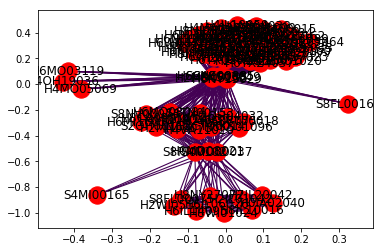

In [74]:
net.draw_networkx(cannet_trim, width=weights, edge_color=weights)

In [75]:
pc = net.adj_matrix(g)

In [76]:
pc

<536x536 sparse matrix of type '<type 'numpy.int64'>'
	with 1858 stored elements in Compressed Sparse Row format>

In [77]:
cp = pc.transpose()

In [78]:
cp

<536x536 sparse matrix of type '<type 'numpy.int64'>'
	with 1858 stored elements in Compressed Sparse Column format>

In [79]:
cc = pc*cp

In [80]:
cc_Graph = net.Graph(cc)

In [81]:
print(net.info(cc_Graph))

Name: 
Type: Graph
Number of nodes: 536
Number of edges: 108594
Average degree: 405.2015


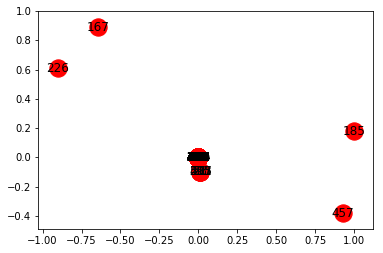

In [83]:
net.draw_networkx(cc_Graph)